# Análisis exploratorio de datos

## `Black Friday Sales EDA`

In [16]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


### Preprocesamiento

In [2]:
# Exploración inicial
print(df.head())
print(df.info())
print(df.describe())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [17]:
# Analizar los tipos de datos
print(df.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


In [19]:
# Manejo de valores faltantes
print(df.isnull().sum())
df = df.dropna()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [20]:
# Limpieza de datos
# Convertir tipos de datos
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('int64')
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('int64')

C:\Users\PC\AppData\Local\Temp\ipykernel_34740\1791053088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].astype('category')
C:\Users\PC\AppData\Local\Temp\ipykernel_34740\1791053088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype('category')
C:\Users\PC\AppData\Local\Temp\ipykernel_34740\1791053088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [21]:
# Manejar valores nulos
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)

C:\Users\PC\AppData\Local\Temp\ipykernel_34740\774571034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
C:\Users\PC\AppData\Local\Temp\ipykernel_34740\774571034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category_3'] = df['Product_Category_3'].fillna(0)


In [23]:
# Crear df_date_grouped
df['Purchase_Date'] = pd.to_datetime(df['Purchase'])
df_date_grouped = df.groupby(df['Purchase_Date'].dt.strftime('%Y-%m-%d')).agg({
    'Purchase': 'sum',
    'User_ID': 'nunique',
    'Product_ID': 'nunique',
    'Gender': 'count',
    'Age': 'count',
    'Occupation': 'mean',
    'City_Category': 'count',
    'Stay_In_Current_City_Years': 'count',
    'Marital_Status': 'mean'
}).reset_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_34740\504383258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchase_Date'] = pd.to_datetime(df['Purchase'])


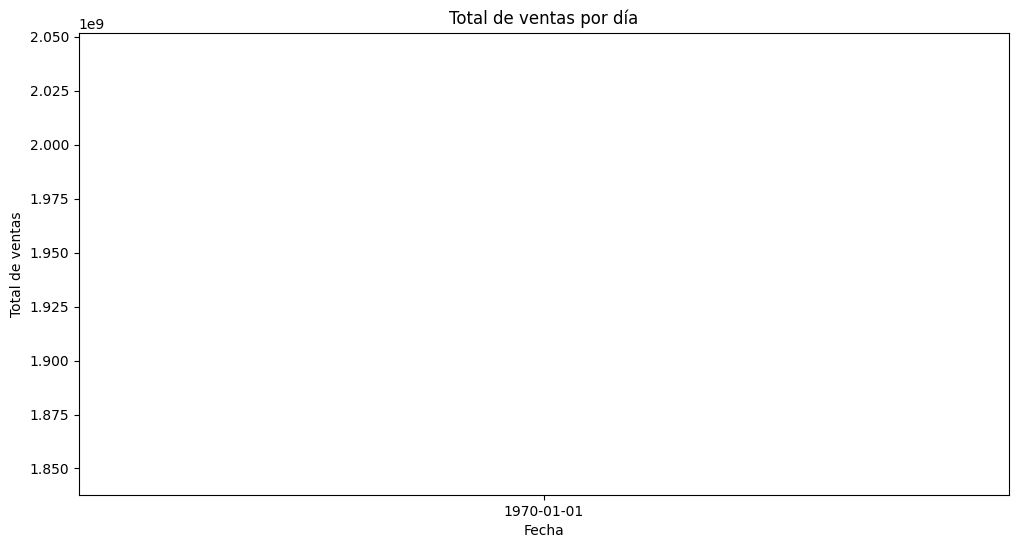

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_date_grouped['Purchase_Date'], y=df_date_grouped['Purchase'])
plt.title('Total de ventas por día')
plt.xlabel('Fecha')
plt.ylabel('Total de ventas')
plt.show()

In [ ]:
df = df.select_dtypes(include=['number'])

In [9]:
# Análisis exploratorio de datos
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.show()

ValueError: could not convert string to float: '4+'

<Figure size 1200x800 with 0 Axes>